In [1]:
from collections import defaultdict 
import pydot
import os
import sys
import csv
import random
from IPython.display import Image, display
from matplotlib import pyplot as plt


In [2]:
path = "/home/achilleas/Desktop/thesis/DATASET F1/Fold_1/20%_test"
filename = "default_G_tone_map"
grgFilename = "default_G'"
mapFilename = "default_unique_mapping"
rootDir = [os.path.join(root, name)
             for root, dirs, files in os.walk(path)
             for name in files
             if name.endswith(filename+".csv")]
grgDir = [os.path.join(root,name)
             for root, dirs, files in os.walk(path)
             for name in files
             if name.endswith(grgFilename+".txt")]


In [3]:
classes = {"ACCESS_MASK":0,"Atom":1,"BOOLEAN":2,"Debug":3,"Device":4,
                                 "Environment":5,"File":6,"HANDLE":7,"Job":8,"LONG":9,"LPC":10,
                                 "Memory":11,"NTSTATUS":12,"Object":13,"Other":14,"PHANDLE":15,
                                 "PLARGE_INTEGER":16,"Process":17,"PUNICODE_STRING":18,
                                 "PULONG":19,"PULARGE_INTEGER":20,"PVOID_SIZEAFTER":21,
                                 "PWSTR":22,"Registry":23,"Security":24,"Synchronization":25,
                                 "Time":26,"Transaction":27,"ULONG":28,"WOW64":29, "DummyStart":30,"DummyEnd":31}

In [4]:
# Python program for implementation of Ford Fulkerson algorithm 


#This class represents a directed graph using adjacency matrix representation 
class Graph: 

    def __init__(self,graph): 
        self.graph = graph # residual graph 
        self. ROW = len(graph) 
        #self.COL = len(gr[0]) 
        

    '''Returns true if there is a path from source 's' to sink 't' in 
    residual graph. Also fills parent[] to store the path '''
    def BFS(self,s, t, parent): 

        # Mark all the vertices as not visited 
        visited =[False]*(self.ROW) 
        
        # Create a queue for BFS 
        queue=[] 
        
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[s] = True
        
        # Standard BFS Loop 
        while queue: 

            #Dequeue a vertex from queue and print it 
            u = queue.pop(0) 

            # Get all adjacent vertices of the dequeued vertex u 
            # If a adjacent has not been visited, then mark it 
            # visited and enqueue it 
            for ind, val in enumerate(self.graph[u]): 
                if visited[ind] == False and val > 0 : 
                    queue.append(ind) 
                    visited[ind] = True
                    parent[ind] = u 

        # If we reached sink in BFS starting from source, then return 
        # true, else false 
        return True if visited[t] else False


    # Returns tne maximum flow from s to t in the given graph 
    def FordFulkerson(self, source, sink): 

        # This array is filled by BFS and to store path 
        parent = [-1]*(self.ROW) 

        max_flow = 0 # There is no flow initially 

        # Augment the flow while there is path from source to sink 
        while self.BFS(source, sink, parent) : 

            # Find minimum residual capacity of the edges along the 
            # path filled by BFS. Or we can say find the maximum flow 
            # through the path found. 
            path_flow = float("Inf") 
            s = sink 
            while(s != source): 
                path_flow = min (path_flow, self.graph[parent[s]][s]) 
                s = parent[s] 

            # Add path flow to overall flow 
            max_flow += path_flow 

            # update residual capacities of the edges and reverse edges 
            # along the path 
            v = sink 
            while(v != source): 
                u = parent[v] 
                self.graph[u][v] -= path_flow 
                self.graph[v][u] += path_flow 
                v = parent[v] 
        print ("max flow is: "+str(max_flow))
        return max_flow


# # Create a graph given in the above diagram 

# graph = [[0, 16, 13, 0, 0, 0], 
# 		[0, 0, 10, 12, 0, 0], 
# 		[0, 4, 0, 0, 14, 0], 
# 		[0, 0, 9, 0, 0, 20], 
# 		[0, 0, 0, 7, 0, 4], 
# 		[0, 0, 0, 0, 0, 0]] 

# g = Graph(graph) 

# source = 0; sink = 5

# print ("The maximum possible flow is %d " % g.FordFulkerson(source, sink)) 

# #This code is contributed by Neelam Yadav 


In [5]:
def getSourceSink(path):
    verteces = []
    with open(path) as fp:
        line = fp.readline()
        while line:
            verteces.append(line.split(","))
            line = fp.readline()
    return [verteces[0][0],verteces[-1][1].strip()]

In [6]:
def getArray (path):
    results = []
    with open(path) as csvfile:
        reader = csv.reader(csvfile,csv.QUOTE_NONNUMERIC) # change contents to floats
        for row in reader: # each row is a list
            nums = []
            for i in row: 
                if i :
                    nums.append(int(i))
            results.append(nums)
    return results

In [7]:
def createExtendedG(g):
    parents = []
    children = []
#     maxDegV= findMaxOutDegreeVertex(g)
#     minDegV = findMaxInDegreeVertex(g)
    print(maxDegV)
    print(minDegV)
    for l in minDegV:
        children.append(l[0])
    for h in maxDegV:
        parents.append(h[0])
    for i in range(len(g)):
        g[i].append(0)
        g[i].append(0)
    g.append([0 for i in range (len(g)+2)])
    g.append([0 for i in range (len(g)+1)])
    x,y = len(g),len(g[0])
    for p in parents:
        g[x-2][p] =1
    for c in children:
        g[c][x-1]= 1
    return g

In [8]:
def createImage(g,path):
    G = pydot.Dot(graph_type='digraph')
    for i in range(len(g)):
        x = pydot.Node(i)
        for j in range(len(g[i])):
            if g[i][j]!= 0 :
                y = pydot.Node(j)
                e = pydot.Edge(i,j)
                G.add_edge(e)
                
    im = Image(G.create_png())
    G.write_png(path)
    display(im)             

In [9]:
def findMaxOutDegreeVertex(g):
    outDegrees={}
    return_matrix = []
    for i in range(len(g)):
        for j in range(len(g[i])):
            if g[i][j]!=0:
                if i not in outDegrees:
                    outDegrees[i]=[g[i][j],1]
                else: 
                    weight = outDegrees[i][0]+g[i][j]
                    cardinality = outDegrees[i][1]+1
                    outDegrees[i]=[weight,cardinality]
    return outDegrees
    
#     sorted_deg = sorted(outDegrees.items(), key=lambda kv: kv[1])
#     return_matrix.append([sorted_deg[0]])
#     return_matrix.append([sorted_deg[-1]])
#     for d in range(1, len(sorted_deg)-1):
#         if sorted_deg[0][1] == sorted_deg[d][1]:
#             return_matrix[0].append(sorted_deg[d])
#     for h in range(len(sorted_deg)-2, 0 , -1):
#         if sorted_deg[-1][1] == sorted_deg[h][1]:
#             return_matrix[1].append(sorted_deg[h])
#     return return_matrix[1]
    

In [10]:
def findMaxInDegreeVertex(g):
    inDegrees= {}
    return_matrix = []
    for i in range (len(g)):
        for j in range(len(g[i])):
            if g[j][i]!=0:
                if i not in inDegrees:
                    inDegrees[i] = [g[j][i],1]
                else: 
                    weight = inDegrees[i][0]+g[j][i]
                    cardinality = inDegrees[i][1]+1
                    inDegrees[i]=[weight,cardinality]
                    
    return inDegrees    
#     sorted_deg = sorted(inDegrees.items(), key=lambda kv: kv[1][1])
#     return_matrix.append([sorted_deg[0]])
#     return_matrix.append([sorted_deg[-1]])
    
#     for d in range(1, len(sorted_deg)-1):
#         if sorted_deg[0][1] == sorted_deg[d][1]:
#             return_matrix[0].append(sorted_deg[d])
#     for h in range(len(sorted_deg)-2, 0 , -1):
#         if sorted_deg[-1][1] == sorted_deg[h][1]:
#             return_matrix[1].append(sorted_deg[h])
#     return return_matrix[1]


In [11]:
def executeTrial(path):
    sp_path = path.split('/')
    sp_path[-1] = 'FF_in_defaultG.csv'
    write_path = '/'.join(sp_path)
    g = Graph(getArray(path)) 
    sp_path[-1]= "default_G'.txt"
    source = classes[getSourceSink('/'.join(sp_path))[0]]
    sink = classes[getSourceSink('/'.join(sp_path))[1]]
    print("family %s/%s with source %d sink %d" %(sp_path[-3],sp_path[-2],source,sink))
    fG = g.FordFulkerson(source,sink)
    return [fG, sp_path[-3]]
#     sp_path[-1] = 'G_image.png'
#     createImage(getArray(path),'/'.join(sp_path))
#     print ("The maximum possible flow is %d " % g.FordFulkerson(source, sink))
#     print ("the max flow graph is: ")
#     sp_path[-1] = 'FF_G_image.png'
#     createImage(fG,'/'.join(sp_path))
#     with open(write_path, mode='w') as ff:
#         ff_writer = csv.writer(ff, delimiter=',')
#         for i in fG:
#             ff_writer.writerow(i)
        

In [12]:
def createCoverageGraph(g):
    cvg = []
    combinedDegrees = {}
    inDegrees = findMaxInDegreeVertex(g)
    inKeys =list(inDegrees.keys())
    outDegrees = findMaxOutDegreeVertex(g)
    outKeys =list(outDegrees.keys())
    combinedDegrees= outDegrees.copy()
    for i in inKeys:
        if i in outDegrees:
            combinedDegrees[i] = [inDegrees[i][0]+outDegrees[i][0], inDegrees[i][1]+outDegrees[i][1]]
        else : 
            combinedDegrees[i] = inDegrees[i]
    sortedcDegrees = sorted(combinedDegrees.items(), key = lambda kv:kv[0])
    print("combo")
    print(combinedDegrees)
    cKeys = [i[0] for i in sortedcDegrees]
    print("---------------------------------")
    print ("in degrees [w,c]")
    print(inDegrees)
    print("out degrees [w,c]")
    print(outDegrees)
    print("=================================")
    print(inKeys)
    print(outKeys)
    print(cKeys)
    
    
    
#     sorted_deg = sorted(outDegrees.items(), key=lambda kv: kv[1][0],reverse = True)
#     for i in range(len(outDegrees)):
#         parent = sorted_deg[i][0]
#         print(parent)
#         weight = outDegrees[parent][0]
#         cardinality = outDegrees[parent][0]
#         row = [0 for i in range(len(outDegrees))]
# #         print(outDegrees[i])
#         for j in range(i,len(outDegrees)):
#             if outDegrees[j][0] < weight :
#                 row[j] = 1
#         cvg.append(row)
    print("cvg :")
    print(cvg)
    

family Prorat,AVW,/3B0B81DF2D175DFB9D7821FA994F622E with source 11 sink 23
max flow is: 9
family Prorat,AVW,/3B5B967506D4E3440260A3217F77FD47 with source 11 sink 23
max flow is: 20
family Prorat,AVW,/3AB0080CEEBFF8BAE6183591307BC493 with source 11 sink 23
max flow is: 9
family Prorat,AVW,/3B50CF07CE1C37FBDF95FE839D71506E with source 11 sink 23
max flow is: 9
family Prorat,AVW,/3A56B7D56163BD58A93BE6C44EC595F2 with source 11 sink 23
max flow is: 35
family Prorat,AVW,/3AD587523A4F0E20C811ED5F94F6731A with source 11 sink 23
max flow is: 35
family Prorat,AVW,/3AB9E834B547510544EE8461E9A2EDF5 with source 11 sink 23
max flow is: 35
family Prorat,AVW,/3A08F34AB9EDEDA25CDC4269BD40113C with source 11 sink 23
max flow is: 37
family DKI,PoisonIvy,/3CB4955ED3FD43AFE3E2DAF3C127B95C with source 11 sink 23
max flow is: 18
family DKI,PoisonIvy,/3A54741AEC06EC953E22B671B5BFE627 with source 11 sink 23
max flow is: 18
family DKI,PoisonIvy,/3B1033DBDC6FB11CA8ACF384D95BF318 with source 11 sink 23
max flow 

family Banker,Banker,/3ADED6601157F8E629BC50E6C6429669 with source 11 sink 23
max flow is: 26
family Banker,Banker,/3A61533199657633A8A09952927631D3 with source 11 sink 23
max flow is: 26
family Banker,Banker,/3A68BC769D6D13EA4FDE350CA3E849AE with source 17 sink 23
max flow is: 0
family Banker,Banker,/3AC17029181CBEFDFE2963287BB528AD with source 17 sink 23
max flow is: 0
family Banker,Banker,/3B00AA293486EA3D3A46C78045E01343 with source 11 sink 23
max flow is: 22
family Banker,Banker,/3B5FC7E2F4A7F5E565FEE3C0440ECBF9 with source 17 sink 23
max flow is: 0
family Banker,Banker,/3B02C06C677E4B888A6B674B94C91860 with source 11 sink 23
max flow is: 9
family Banker,Banker,/3B05B54859A090D6CD44ADC0E4698F74 with source 11 sink 23
max flow is: 20
family Banker,Banker,/3ABEA08C971018B11079AC8D9DF75A76 with source 11 sink 23
max flow is: 9
family Banker,Banker,/3a29feaa092f2d9c2351bc670b1d8667 with source 17 sink 23
max flow is: 0
family Banker,Banker,/3AD6ECB4CF154052B6D32B0DA8809631 with source

family IRCBot,Sdbot,/3a9187d0109773400c14164c68b9f2ff with source 11 sink 23
max flow is: 36
family IRCBot,Sdbot,/3A2F44B5C0054A0D3D02929555F70020 with source 11 sink 23
max flow is: 31
family IRCBot,Sdbot,/3AD8217A4C877C8E64FA378F83F70D78 with source 11 sink 23
max flow is: 16
family IRCBot,Sdbot,/3b69478cdf554f51e55fab88981c129c with source 11 sink 23
max flow is: 36
family IRCBot,Sdbot,/3a1c14867bc05c6460ceef1878c6f413 with source 11 sink 23
max flow is: 16
family IRCBot,Sdbot,/3a6032052479e91e110c348afc4603b6 with source 11 sink 23
max flow is: 56
family Nilage,Lineage,/3B121A69A66269E733FFCD5EBC2938D1 with source 11 sink 23
max flow is: 16
family Nilage,Lineage,/3A91D5D9E3ECC03B17F0356DE26C3AB3 with source 11 sink 23
max flow is: 17
family Nilage,Lineage,/3BC83FA4B5868312A3D3249F79225BD5 with source 11 sink 23
max flow is: 32
family Nilage,Lineage,/3A898626196EDB188EDA8F753E069453 with source 11 sink 23
max flow is: 27
family Nilage,Lineage,/3B1F4B1B37BB4673C1498186A83049BE with s

family Gaobot,Agobot,/3a7db6005e96f3f32bb625386dad7cd1 with source 11 sink 23
max flow is: 36
family Gaobot,Agobot,/3AAE36F8B6922049E5CA477FF8A92D88 with source 11 sink 23
max flow is: 27
family Rbot,Sdbot,/3AA5CF03CCE42FD330D347B1FBFA9EB2 with source 11 sink 23
max flow is: 9
family Rbot,Sdbot,/3ad468db352443b20b180bacdb3e2cac with source 11 sink 23
max flow is: 50
family Rbot,Sdbot,/3ad86026373ae3d36697a2682230d889 with source 2 sink 23
max flow is: 1
family Rbot,Sdbot,/3b89ec2a84f48040b8c64b44bdb39ed5 with source 11 sink 23
max flow is: 25
family Rbot,Sdbot,/3A85DE80C05A162B68243D8F0DA205B4 with source 2 sink 23
max flow is: 1
family Rbot,Sdbot,/3A261F7E3DF4D215B86A506988D30AD7 with source 11 sink 23
max flow is: 9
family Rbot,Sdbot,/3b733d6796b4625dced5ee537ec7051a with source 11 sink 23
max flow is: 61
family Rbot,Sdbot,/3a1f508f34d3dd9740bd655e4becdaaf with source 2 sink 23
max flow is: 1
family Rbot,Sdbot,/3A4B75007F9801EDF45FC0EB94DF4896 with source 11 sink 23
max flow is: 80
f

family Hupigon,AWQ,/3AB933CE974019C51AA537046C8B5D65 with source 11 sink 23
max flow is: 9
family Hupigon,AWQ,/3A7D1B0D75E0234C7B569F57EEC83BDE with source 11 sink 23
max flow is: 19
family Hupigon,AWQ,/3B9A3E11B1D7088F5CCC0A4A9DF9C08C with source 11 sink 23
max flow is: 19
family Hupigon,AWQ,/3AFB77568A49003044E3D79CD0DBAC50 with source 11 sink 23
max flow is: 16
family Hupigon,AWQ,/3AF18921CAB6ECC92EADA50A226E3264 with source 11 sink 23
max flow is: 27
family Hupigon,AWQ,/3AA8D9320C880AD8FAD1167938CE2A41 with source 11 sink 23
max flow is: 20
family Hupigon,AWQ,/3A6A781FB2A3B7BE23DF3A16993DED55 with source 11 sink 23
max flow is: 37
family Hupigon,AWQ,/3B18AB134315986AF8B4F18D06E9BC31 with source 11 sink 23
max flow is: 18
family Hupigon,AWQ,/3A32AE2B54A6F3755D174AAE001C4127 with source 11 sink 23
max flow is: 13
family Hupigon,AWQ,/3B3A6041F5BF5E3207D00C8C9A8055AB with source 17 sink 23
max flow is: 0
family Hupigon,AWQ,/3B2F5678FE993D55820E3978CFFA1723 with source 11 sink 23
max fl

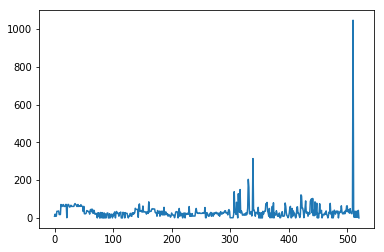

In [13]:
# getSourceSink(grgDir[0])
max_flow_vals=[]
for i in rootDir:
    max_flow_vals.append(executeTrial(i)[0])
print(max_flow_vals)
plt.plot(max_flow_vals)
plt.show()
# executeTrial(rootDir[0])
# ar = [[1,0,0,2,0],
#       [0,1,2,1,1],
#       [2,2,2,2,2],
#       [2,1,2,3,1],
#       [0,1,2,1,4]]
# createCoverageGraph(getArray(rootDir[6]))
# g = createExtendedG(ar)
# G = pydot.Dot(graph_type='digraph')
# for i in range(len(g)):
#     x = pydot.Node(i)
#     for j in range(len(g[i])):
#         if g[i][j]!= 0 :
#             y = pydot.Node(j)
#             e = pydot.Edge(i,j)
#             G.add_edge(e)
                
# im = Image(G.create_png())
# display(im)             